In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Change the Directory to Machine Learning folder
%cd /content/drive/My Drive/Machine Learning/

/content/drive/My Drive/Machine Learning


In [ ]:
## For Q10, load given credit card dataset into a Pandas DataFrame
credit_card_df=pd.read_csv('/content/drive/My Drive/Machine Learning/creditcard_2023.csv', index_col=0)
credit_card_df


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1


In [ ]:
# For Q10, show the shape of the dataset/rd_df.shape)
print("Shape of the dataset:", credit_card_df.shape)

In [ ]:
#For Q11, show the sum of "Class" column using sum(df["Class"])
class_sum = sum(credit_card_df['Class'])
print("Sum of class:", class_sum)

Sum of class: 284315


In [ ]:
#For Q11, show the sum of "Class" column using df["class"].sum()
class_sum = credit_card_df['Class'].sum()
print("Sum of class:", class_sum)

Sum of class: 284315


In [ ]:
#For Q12, show event_rate
event_rate = class_sum/len(credit_card_df)
print("Event rate:", event_rate)
print("The event rate of 0.5 represents show that there is equal no. of real and fraudulent transactions")
print("In a real world scenerio, this dataset cannot be considered authentic because fraudulent transcations are rare and only a small portion can be found. This data may have been filtered for machine learning practice module purpose")
print('The imbalance provided can affect the model training and evaluation in a real life scenario, therefore other methods are required to handle the imbalanced in a real life scenario')

Event rate: 0.5
The event rate of 0.5 represents show that there is equal no. of real and fraudulent transactions
In a real world scenerio, this dataset cannot be considered authentic because fraudulent transcations are rare and only a small portion can be found. This data may have been filtered for machine learning practice module purpose
The imbalance provided can affect the model training and evaluation in a real life scenario, therefore other methods are required to handle the imbalanced in a real life scenario


In [ ]:
#Q 13
#Show first 5 rows of the dataset using the head() function
credit_card_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
#Get dataset informations
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     56

In [ ]:
#Missing values in each column
credit_card_df.isnull().sum()
#no missing value detected

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#Look for outliers
import numpy as np
from scipy import stats
z_scores = np.abs(stats.zscore(credit_card_df))
threshold = 2
outliers = np.where(z_scores > threshold)
outlier_indices = list(zip(outliers[0], outliers[1]))
# Print the first 10 outliers
print(outlier_indices[:10])
outlier_count = 0
for row_idx, col_idx in outlier_indices:
    outlier_value = credit_card_df.iat[row_idx, col_idx]
    print(f"Outlier at row {row_idx}, column {col_idx}: {outlier_value}")
    outlier_count += 1

    if outlier_count >= 10:
        break  # Exit the loop after printing the first 10 outliers

[(0, 2), (2, 14), (2, 18), (3, 17), (7, 27), (8, 5), (8, 23), (11, 5), (11, 23), (18, 1)]
Outlier at row 0, column 2: 2.496266082631564
Outlier at row 2, column 14: 3.0690247739919467
Outlier at row 2, column 18: -2.3660789277247263
Outlier at row 3, column 17: 2.178615999824616
Outlier at row 7, column 27: -2.7482678256229804
Outlier at row 8, column 5: 2.3248160166720564
Outlier at row 8, column 23: 2.248754184052017
Outlier at row 11, column 5: 2.139538755409162
Outlier at row 11, column 23: 2.212669963481749
Outlier at row 18, column 1: -2.8275264535330464


In [ ]:
#Check for real transctions[0] & fraudulent transactions[1]
class_balance = credit_card_df['Class'].value_counts(normalize=True)
print("Class Balance:\n", class_balance)

Class Balance:
 0    0.5
1    0.5
Name: Class, dtype: float64


In [ ]:
#Statistal analysis of the entire Amount column
amount_summary = credit_card_df['Amount'].describe()
print("Amount:\n", amount_summary)

Amount:
 count    568630.000000
mean      12041.957635
std        6919.644449
min          50.010000
25%        6054.892500
50%       12030.150000
75%       18036.330000
max       24039.930000
Name: Amount, dtype: float64


In [ ]:
#Summary of feature column
feature_summary = credit_card_df.loc[:, 'V1':'V28'].describe()
print(" V1-V28 features:\n", feature_summary)

 V1-V28 features:
                  V1            V2            V3            V4            V5  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean  -5.638058e-17 -1.319545e-16 -3.518788e-17 -2.879008e-17  7.997245e-18   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00 -9.952786e+00   
25%   -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01 -2.934955e-01   
50%   -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02  8.108788e-02   
75%    8.326582e-01  3.435552e-01  6.285380e-01  7.070047e-01  4.397368e-01   
max    2.229046e+00  4.361865e+00  1.412583e+01  3.201536e+00  4.271689e+01   

                 V6            V7            V8            V9           V10  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean  -3.958636e-17 -3.198898e-17  2.109273e-17  3.998623e-17  1.991314e-16   
std    1.000001e+00  1.000001e+0

In [ ]:
#separate data for analysis
real = credit_card_df[credit_card_df.Class==0]
fraud = credit_card_df[credit_card_df.Class==1]
print("Real Shape:", real.shape)
print("Fraud Shape:", fraud.shape)

Real Shape: (284315, 30)
Fraud Shape: (284315, 30)


In [ ]:
#statistical analysis
real.Amount.describe()

count    284315.000000
mean      12026.313506
std        6929.500715
min          50.120000
25%        6034.540000
50%       11996.900000
75%       18040.265000
max       24039.930000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count    284315.000000
mean      12057.601763
std        6909.750891
min          50.010000
25%        6074.640000
50%       12062.450000
75%       18033.780000
max       24039.930000
Name: Amount, dtype: float64

In [ ]:
#Analogy of the values of the transactions
credit_card_df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.505761,-0.491878,0.682095,-0.735981,0.338639,0.435088,0.491234,-0.144294,0.585522,0.673665,...,-0.179851,-0.10964,-0.014098,-0.010255,0.130107,-0.061847,-0.071052,-0.214002,-0.102024,12026.313506
1,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,-0.673665,...,0.179851,0.10964,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,12057.601763


In [ ]:
#Build a Sample data set using similar distribution of the real and fraud transaction
#No. of fraud transaction=500
#No. of real transaction=500
real_sample = real.sample(n=500)

In [ ]:
#Create new dataframe
new_dataset = pd.concat([real_sample, fraud], axis=0) #axiz=0 is rows

In [ ]:
new_dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
236812,-0.073619,0.015220,0.222544,-0.905412,0.644962,0.023254,0.887860,-0.211828,0.465256,0.571253,...,0.025507,1.095418,-0.308994,-0.769037,-0.649253,-0.397976,-0.031389,0.827792,4657.42,0
37074,1.072416,-0.402750,0.614236,-0.400890,0.115583,0.029063,0.413339,-0.171109,0.698491,0.590827,...,-0.229320,-0.880020,0.072867,-0.266688,0.294887,0.307510,-0.283052,-0.075010,22540.93,0
8094,-0.297621,-0.146647,1.456543,0.391312,0.632145,0.926128,1.249388,-0.414805,1.484996,1.943972,...,-0.384703,-0.063658,-0.018095,-0.776982,-0.054417,0.203738,-0.798954,-0.713204,12950.13,0
45428,1.035868,-0.345505,0.502424,-0.402025,0.286380,0.304222,0.433067,-0.160094,0.529592,0.468165,...,-0.223582,-0.749688,0.070465,-0.852768,0.273251,0.364916,-0.245520,-0.047108,2756.09,0
183711,1.627183,-0.757653,0.037033,-0.741253,0.866170,2.647136,-0.084357,0.173559,1.967206,0.335940,...,-0.079200,0.416686,0.204566,1.424220,-0.724504,1.256041,-0.156997,-0.129317,21375.85,0


In [ ]:
new_dataset.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,-0.513556,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [ ]:
new_dataset['Class'].value_counts()

1    284315
0       500
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.522432,-0.490442,0.672476,-0.765974,0.304655,0.483713,0.487925,-0.153395,0.610295,0.650557,...,-0.132980,-0.094246,-0.065234,-0.020243,0.153086,-0.115303,-0.084499,-0.256225,-0.129710,12079.879080
1,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,-0.673665,...,0.179851,0.109640,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,12057.601763


In [ ]:
#split data
x = new_dataset.drop(columns='Class', axis=1)
y = new_dataset['Class']
x


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
id,,,,,,,,,,,,,,,,,,,,,
236812,-0.073619,0.015220,0.222544,-0.905412,0.644962,0.023254,0.887860,-0.211828,0.465256,0.571253,...,-0.002732,0.025507,1.095418,-0.308994,-0.769037,-0.649253,-0.397976,-0.031389,0.827792,4657.42
37074,1.072416,-0.402750,0.614236,-0.400890,0.115583,0.029063,0.413339,-0.171109,0.698491,0.590827,...,-0.350245,-0.229320,-0.880020,0.072867,-0.266688,0.294887,0.307510,-0.283052,-0.075010,22540.93
8094,-0.297621,-0.146647,1.456543,0.391312,0.632145,0.926128,1.249388,-0.414805,1.484996,1.943972,...,0.109292,-0.384703,-0.063658,-0.018095,-0.776982,-0.054417,0.203738,-0.798954,-0.713204,12950.13
45428,1.035868,-0.345505,0.502424,-0.402025,0.286380,0.304222,0.433067,-0.160094,0.529592,0.468165,...,-0.258982,-0.223582,-0.749688,0.070465,-0.852768,0.273251,0.364916,-0.245520,-0.047108,2756.09
183711,1.627183,-0.757653,0.037033,-0.741253,0.866170,2.647136,-0.084357,0.173559,1.967206,0.335940,...,-0.251498,-0.079200,0.416686,0.204566,1.424220,-0.724504,1.256041,-0.156997,-0.129317,21375.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85


In [ ]:
print(y)

id
236812    0
37074     0
8094      0
45428     0
183711    0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 284815, dtype: int64


In [ ]:
#Split into train & test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(284815, 29) (227852, 29) (56963, 29)


In [ ]:
#Scale train model
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
#Scale test model
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
#reduce the number of variables while preserving essential information using PSA
from sklearn.decomposition import PCA
#Create PCA instance
n_components = 20
pca = PCA(n_components=n_components)
#Transform the train and test data
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [ ]:
#Train model using PCA for Logestic regression as this is a binary classification problem
model = LogisticRegression(max_iter=20000)
model.fit(x_train_pca, y_train)

LogisticRegression(max_iter=20000)

In [ ]:
#Evaluation of the model performance on train data using PCA on Logestic regression
x_train_prediction=model.predict(x_train_pca)
train_data_accuracy = accuracy_score(x_train_prediction, y_train)*100
train_data_precision = precision_score(x_train_prediction, y_train)*100
train_data_recall = recall_score(x_train_prediction, y_train)*100
train_data_f1 = f1_score(x_train_prediction, y_train)*100

print('Accuracy Score: ', train_data_accuracy)
print('Precision Score: ', train_data_precision)
print('F1 Score: ', train_data_f1)

Accuracy Score:  99.89203518073136
Precision Score:  100.0
F1 Score:  99.94595188399428


In [ ]:
#Test modelusing PCA for Logestic regression as this is a binary classification problem
model = LogisticRegression(max_iter=10000)
model.fit(x_test_pca, y_test)

LogisticRegression(max_iter=10000)

In [ ]:
#Evaluation of the model performance on test data using PCA on Logestic regression
x_train_prediction=model.predict(x_train_pca)
train_data_accuracy = accuracy_score(x_train_prediction, y_train)*100
train_data_precision = precision_score(x_train_prediction, y_train)*100
train_data_recall = recall_score(x_train_prediction, y_train)*100
train_data_f1 = f1_score(x_train_prediction, y_train)*100

print('Accuracy Score: ', train_data_accuracy)
print('Precision Score: ', train_data_precision)
print('F1 Score: ', train_data_f1)

Accuracy Score:  99.87930762073627
Precision Score:  100.0
F1 Score:  99.93958420753154


In [ ]:
#Scale train model
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
#Scale test model
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
#Train model using Logestic regression as this is a binary classification problem
#Scale train model
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
model = LogisticRegression(max_iter=20000)
model.fit(x_train_scaled, y_train)


LogisticRegression(max_iter=20000)

In [ ]:
#Evaluation of the model performance on train data using Logestic regression
x_train_prediction=model.predict(x_train_scaled)
train_data_accuracy = accuracy_score(x_train_prediction, y_train)*100
train_data_precision = precision_score(x_train_prediction, y_train)*100
train_data_recall = recall_score(x_train_prediction, y_train)*100
train_data_f1 = f1_score(x_train_prediction, y_train)*100

print('Accuracy Score: ', train_data_accuracy)
print('Precision Score: ', train_data_precision)
print('F1 Score: ', train_data_f1)

Accuracy Score:  99.91529589382581
Precision Score:  100.0
F1 Score:  99.95759145852422


In [ ]:
#Test model using Logestic regression as this is a binary classification problem
#Scale test model
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(x_test)
model = LogisticRegression(max_iter=10000)
model.fit(x_test_scaled, y_test)

LogisticRegression(max_iter=10000)

In [ ]:
#Evaluation of the model performance on test data using LR
x_test_prediction=model.predict(x_test_scaled)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)*100
test_data_precision = precision_score(x_test_prediction, y_test)*100
test_data_recall = recall_score(x_test_prediction, y_test)*100
test_data_f1 = f1_score(x_test_prediction, y_test)*100

print('Accuracy Score: ', test_data_accuracy)
print('Precision Score: ', test_data_precision)
print('F1 Score: ', test_data_f1)

Accuracy Score:  99.89993504555589
Precision Score:  100.0
F1 Score:  99.9499046430486


In [ ]:
#Train model using Decision Tree as this is a binary classification problem
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=2)
model.fit(x_train_scaled, y_train)
model = DecisionTreeClassifier(random_state=2)
model.fit(x_test_scaled, y_test)

DecisionTreeClassifier(random_state=2)

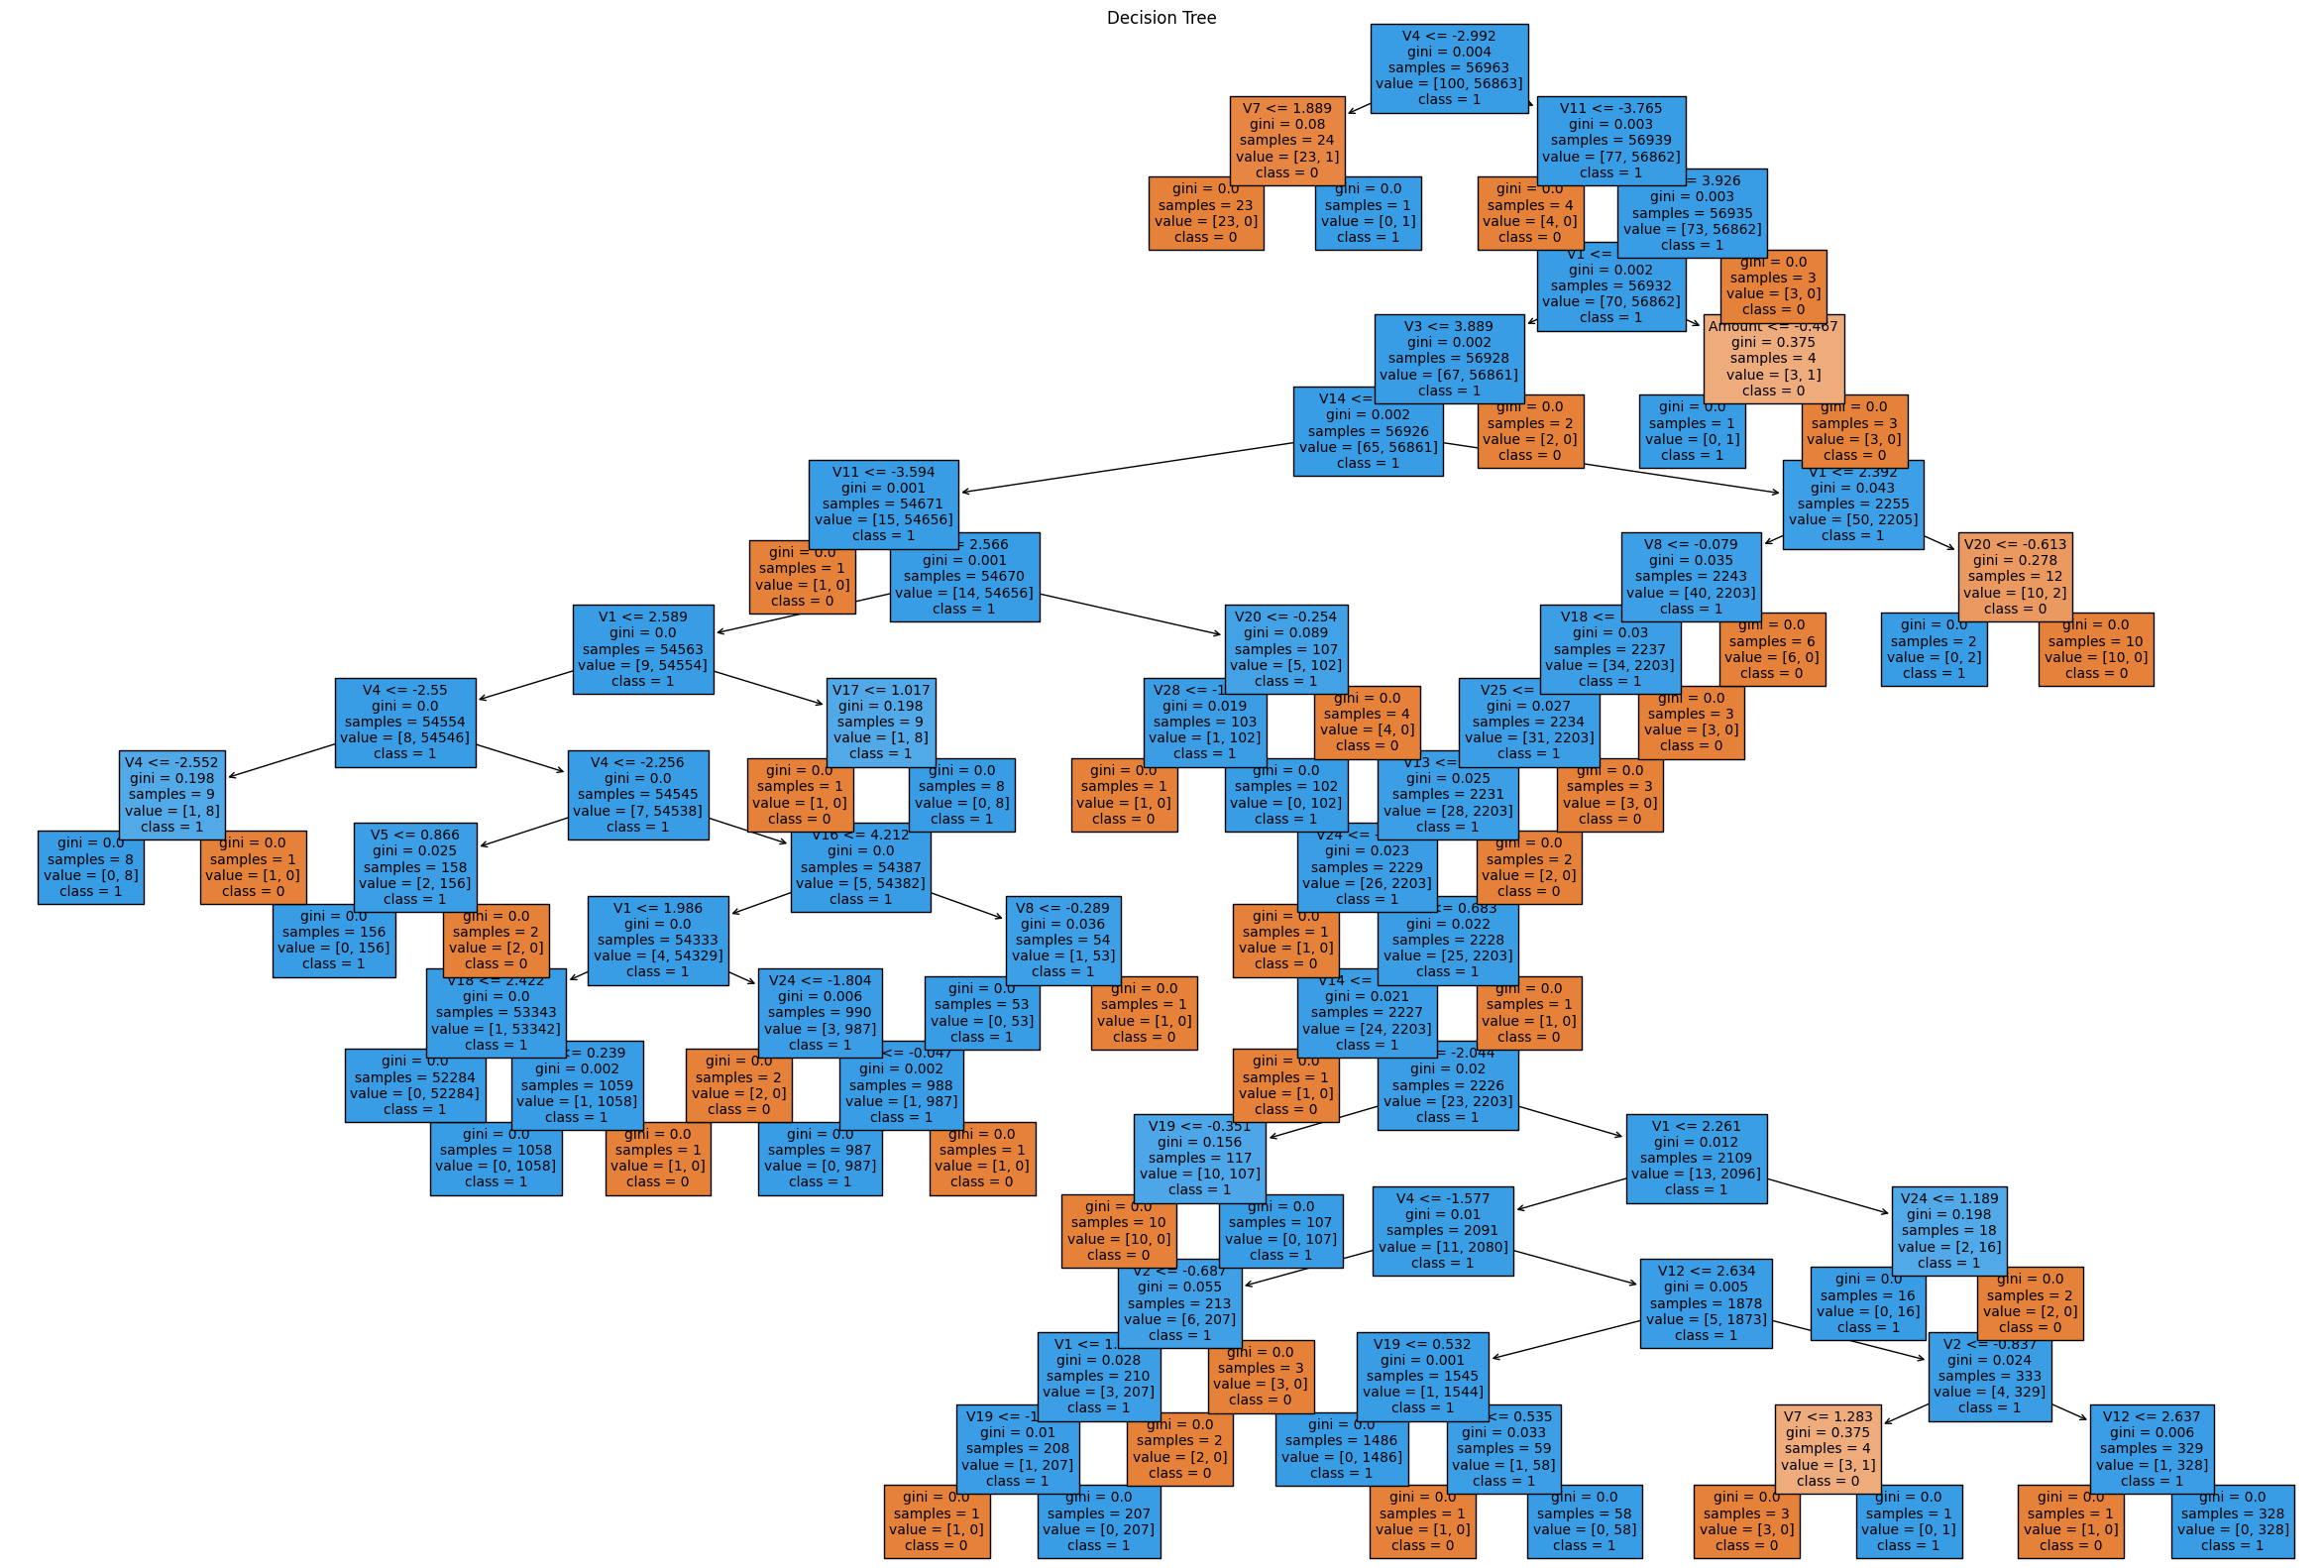

In [ ]:
#plot Decision Tree for train models
plt.figure(figsize=(30, 20))  # Adjust the figure size as needed
plot_tree(model, filled=True, feature_names=x_train.columns, class_names=['0', '1'], fontsize=10)
plt.title("Decision Tree")
plt.show()

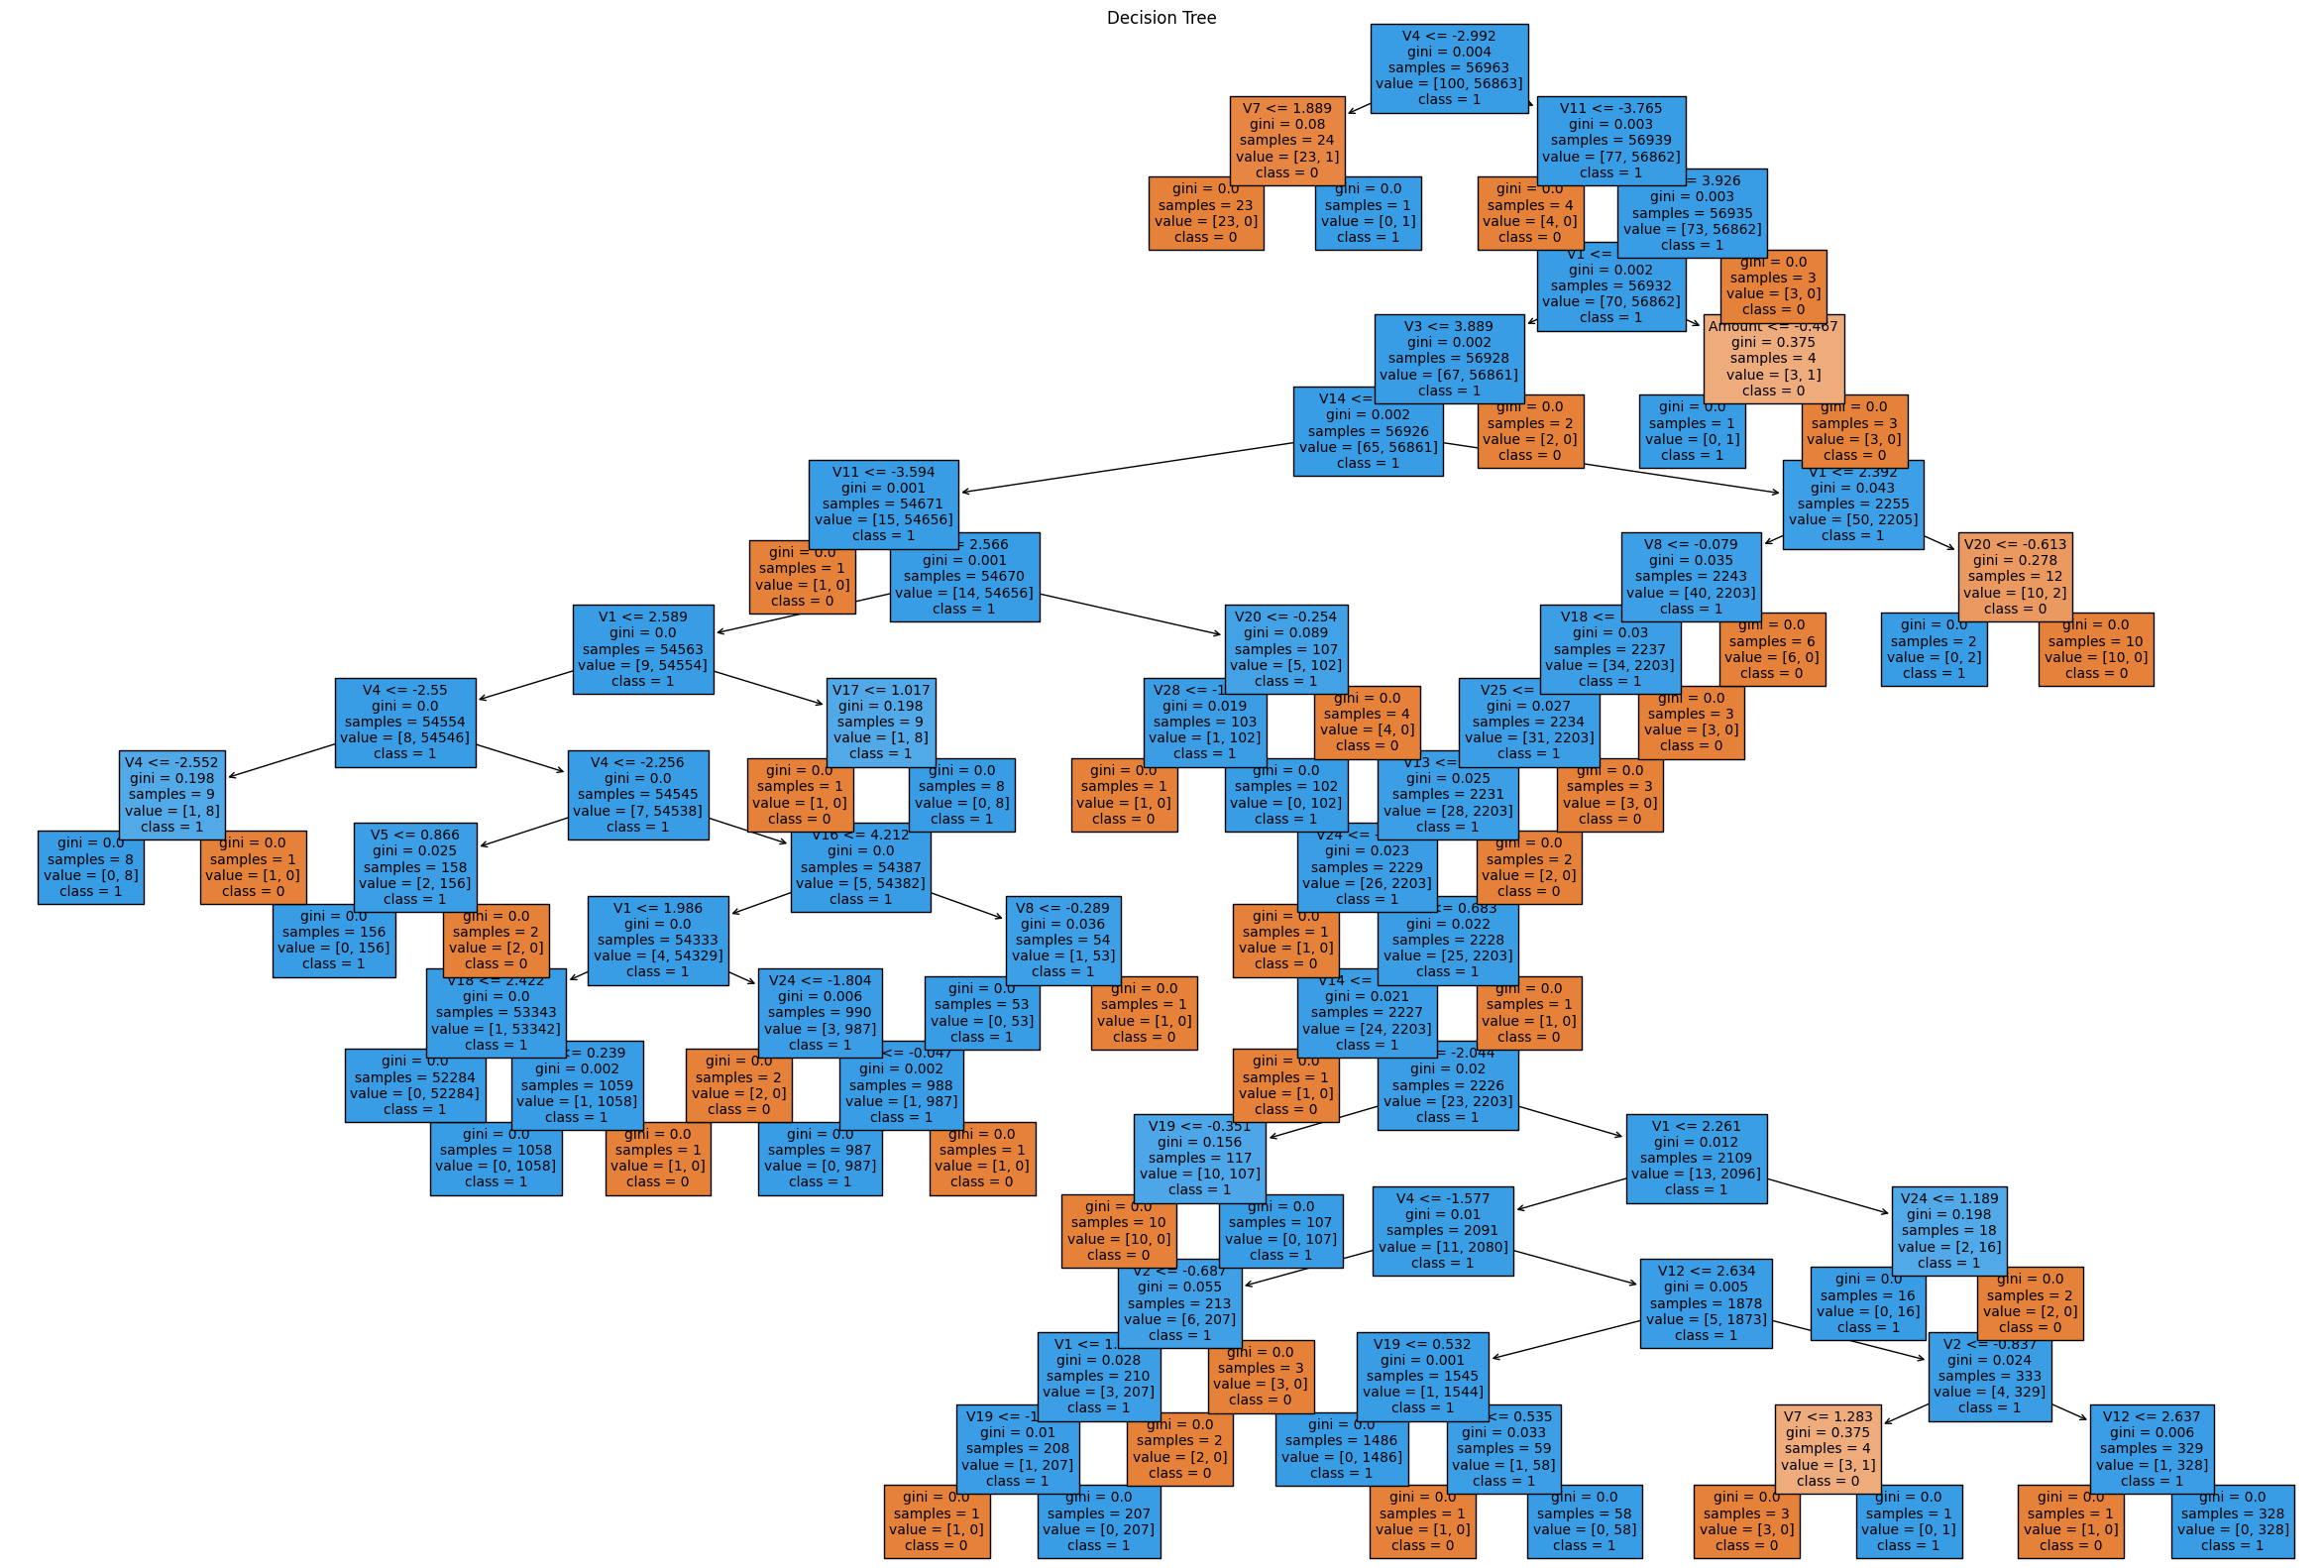

In [ ]:
#plot Decision Tree for test models
plt.figure(figsize=(30, 20))  # Adjust the figure size as needed
plot_tree(model, filled=True, feature_names=x_test.columns, class_names=['0', '1'], fontsize=10)
plt.title("Decision Tree")
plt.show()

In [ ]:
#Evaluation of the model performance on train data using Decision Tree
x_train_prediction=model.predict(x_train_scaled)
train_data_accuracy = accuracy_score(x_train_prediction, y_train)*100
train_data_precision = precision_score(x_train_prediction, y_train)*100
train_data_recall = recall_score(x_train_prediction, y_train)*100
train_data_f1 = f1_score(x_train_prediction, y_train)*100

print('Accuracy Score: ', train_data_accuracy)
print('Precision Score: ', train_data_precision)
print('F1 Score: ', train_data_f1)

Accuracy Score:  99.91485701244667
Precision Score:  99.9863707507518
F1 Score:  99.95736601060136


In [ ]:
#Evaluation of the model performance on test data using Decision Tree
x_test_prediction=model.predict(x_test_scaled)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)*100
test_data_precision = precision_score(x_test_prediction, y_test)*100
test_data_recall = recall_score(x_test_prediction, y_test)*100
test_data_f1 = f1_score(x_test_prediction, y_test)*100

print('Accuracy Score: ', test_data_accuracy)
print('Precision Score: ', test_data_precision)
print('F1 Score: ', test_data_f1)

Accuracy Score:  100.0
Precision Score:  100.0
F1 Score:  100.0


In [ ]:
#Train model using the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=2)
model.fit(x_train_scaled, y_train)


RandomForestClassifier(random_state=2)

In [ ]:
#Evaluation of the model performance on train data using the Random Forest Classifier
x_train_prediction=model.predict(x_train_scaled)
train_data_accuracy = accuracy_score(x_train_prediction, y_train)*100
train_data_precision = precision_score(x_train_prediction, y_train)*100
train_data_recall = recall_score(x_train_prediction, y_train)*100
train_data_f1 = f1_score(x_train_prediction, y_train)*100

print('Accuracy Score: ', train_data_accuracy)
print('Precision Score: ', train_data_precision)
print('F1 Score: ', train_data_f1)

Accuracy Score:  100.0
Precision Score:  100.0
F1 Score:  100.0


In [ ]:
#Evaluation of the model performance on train data using the Random Forest Classifier
x_train_prediction=model.predict(x_train_scaled)
train_data_accuracy = accuracy_score(x_train_prediction, y_train)*100
train_data_precision = precision_score(x_train_prediction, y_train)*100
train_data_recall = recall_score(x_train_prediction, y_train)*100
train_data_f1 = f1_score(x_train_prediction, y_train)*100

print('Accuracy Score: ', train_data_accuracy)
print('Precision Score: ', train_data_precision)
print('F1 Score: ', train_data_f1)

Accuracy Score:  100.0
Precision Score:  100.0
F1 Score:  100.0


In [ ]:
#Test model using the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=2)
model.fit(x_test_scaled, y_test)


RandomForestClassifier(random_state=2)

In [ ]:
#Evaluation of the model performance on test data using Decision Tree
x_test_prediction=model.predict(x_test_scaled)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)*100
test_data_precision = precision_score(x_test_prediction, y_test)*100
test_data_recall = recall_score(x_test_prediction, y_test)*100
test_data_f1 = f1_score(x_test_prediction, y_test)*100

print('Accuracy Score: ', test_data_accuracy)
print('Precision Score: ', test_data_precision)
print('F1 Score: ', test_data_f1)

Accuracy Score:  100.0
Precision Score:  100.0
F1 Score:  100.0


In [ ]:
#Train model using the KNN
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
#Evaluation of the model performance on train data using the KNN
x_train_prediction=model.predict(x_train_scaled)
train_data_accuracy = accuracy_score(x_train_prediction, y_train)*100
train_data_precision = precision_score(x_train_prediction, y_train)*100
train_data_recall = recall_score(x_train_prediction, y_train)*100
train_data_f1 = f1_score(x_train_prediction, y_train)*100

print('Accuracy Score: ', train_data_accuracy)
print('Precision Score: ', train_data_precision)
print('F1 Score: ', train_data_f1)

Accuracy Score:  99.89071853659392
Precision Score:  100.0
F1 Score:  99.94529312121418


In [ ]:
#Test model using the KNN
model = KNeighborsClassifier(n_neighbors=11)
model.fit(x_test_scaled, y_test)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
#Evaluation of the model performance on test data using KNN
x_test_prediction=model.predict(x_test_scaled)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)*100
test_data_precision = precision_score(x_test_prediction, y_test)*100
test_data_recall = recall_score(x_test_prediction, y_test)*100
test_data_f1 = f1_score(x_test_prediction, y_test)*100

print('Accuracy Score: ', test_data_accuracy)
print('Precision Score: ', test_data_precision)
print('F1 Score: ', test_data_f1)

Accuracy Score:  99.82795849937679
Precision Score:  100.0
F1 Score:  99.91390216474556
